#  Linear Regression
## Car Case Study

#### Problem Statement:

-A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit.
 

-They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
they want to understand the factors affecting the pricing of cars in the American market

-Which variables are significant in predicting the price of a car
-How well those variables describe the price of a car



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import the dataset
car=pd.read_csv(r"C:\Users\DK0046TX\Downloads\CarPrice_Assignment.csv")

#Check the rows and columns
car.shape

(205, 26)

Check the Car dataframe

In [150]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [151]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [152]:
#Get the info to check for NULL values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [153]:
#Derive company name from CarName column
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [154]:
#Fixing spelling for company names
car['CompanyName'] = car['CompanyName'].replace('Nissan', 'nissan')
car['CompanyName'] = car['CompanyName'].replace('vokswagen', 'volkswagen')
car['CompanyName'] = car['CompanyName'].replace('vw', 'volkswagen')
car['CompanyName'] = car['CompanyName'].replace('toyouta', 'toyota')
car['CompanyName'] = car['CompanyName'].replace('porcshce', 'porsche')
car['CompanyName'] = car['CompanyName'].replace('maxda', 'mazda')
print('The car names are:',car['CompanyName'].unique())

The car names are: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [155]:
#Check the column names in the car dataframe
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car company')]

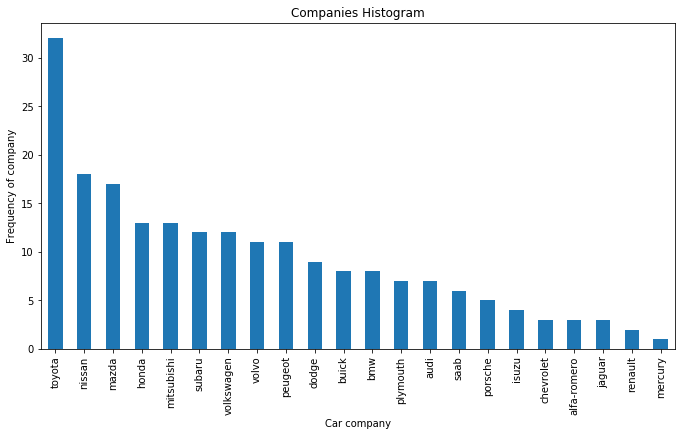

In [156]:
#aplot histogram to see which is the preffered company
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = car.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


Toyoto is the most preffered company 

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

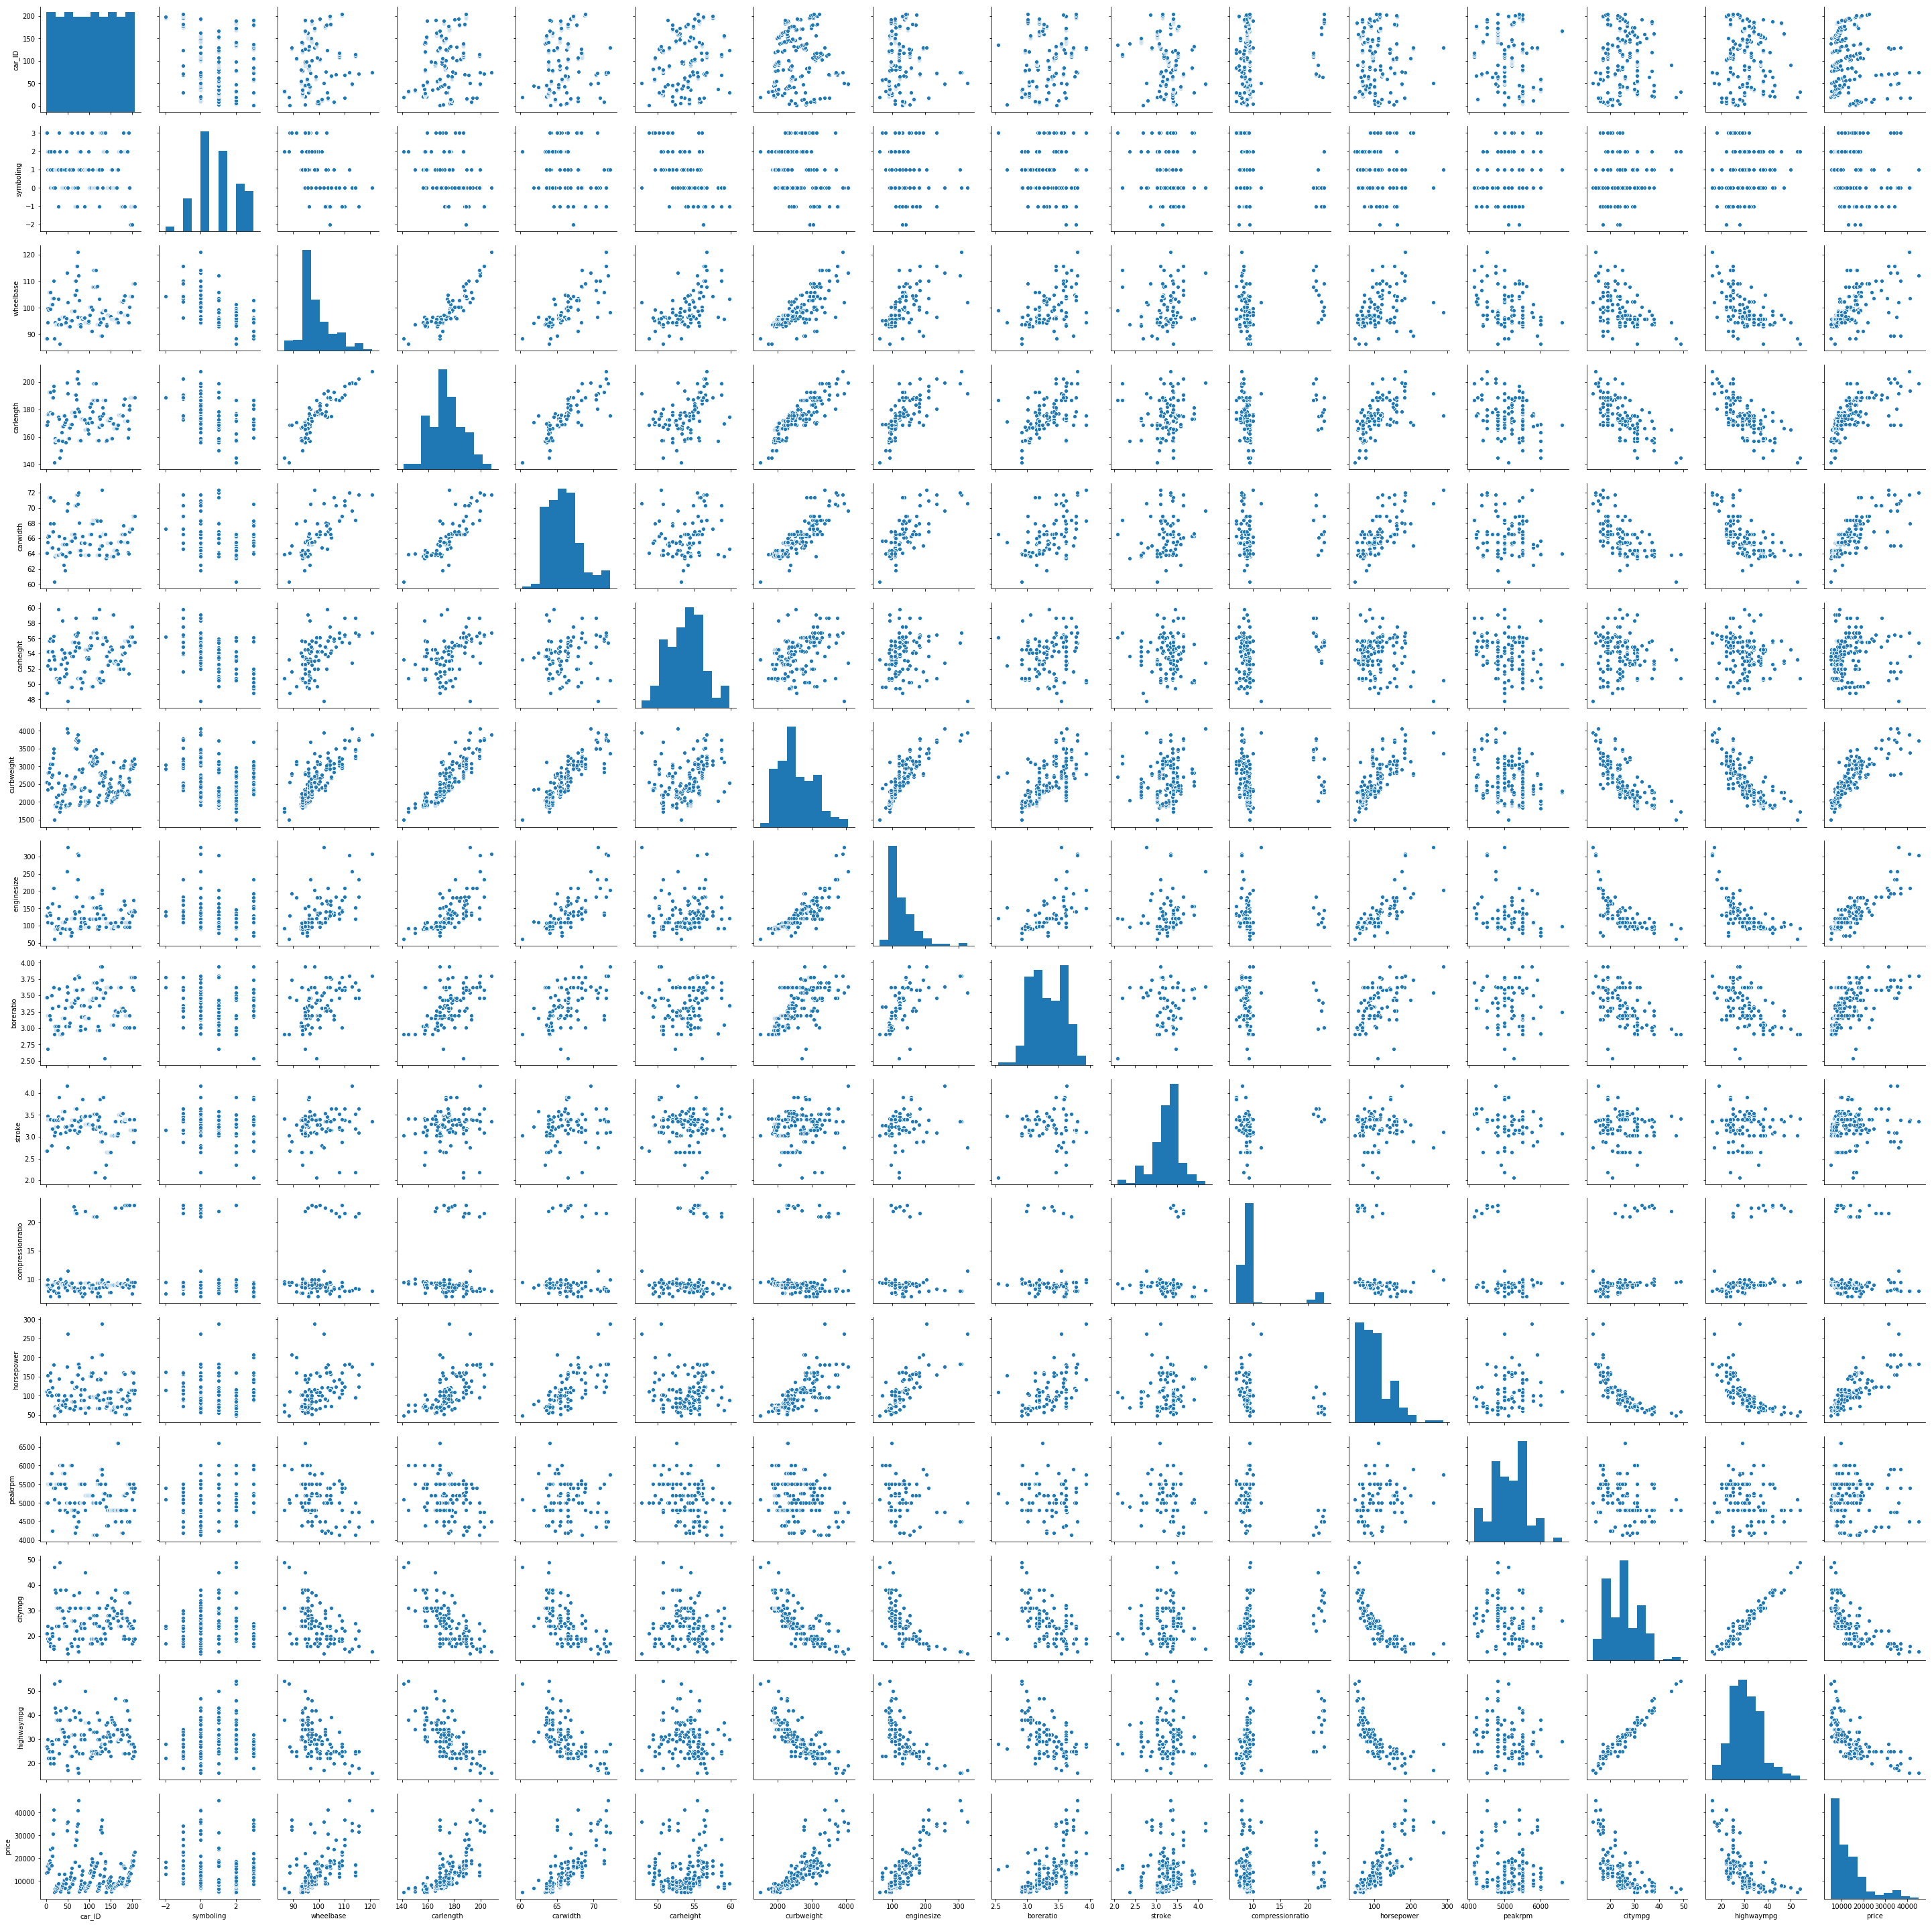

In [157]:
#visualise the numerical variable
sns.pairplot(car)
plt.show()

Findings


Engine size,wheelbase,boreratio,horsepower has positive corelation with price.
Citympg and highwaympg have negative corelation with price.
Increase in horse power reduces the mileage.
  

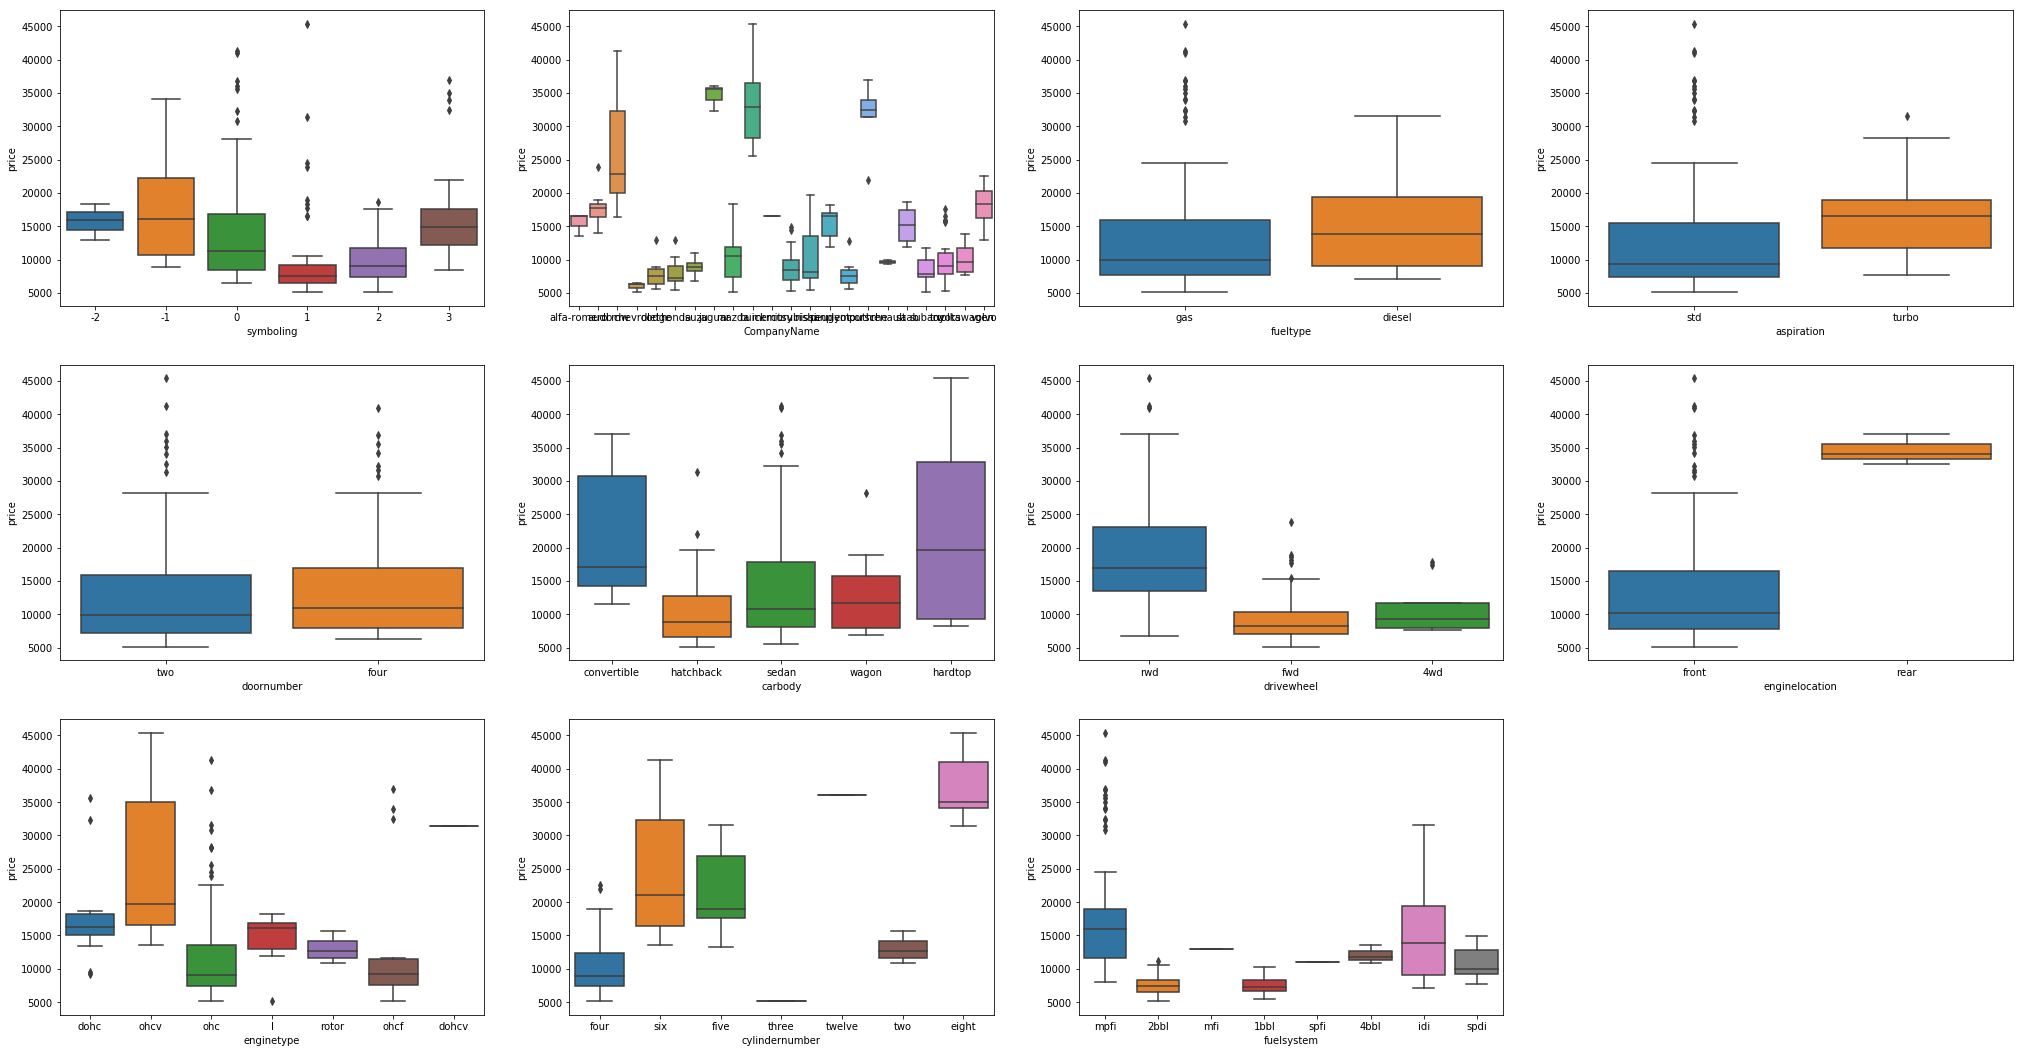

In [158]:
#Visualise the categorical variable
plt.figure(figsize=(35,25))

plt.subplot(4,4,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)

plt.subplot(4,4,2)
sns.boxplot(x = 'CompanyName', y = 'price', data = car)

plt.subplot(4,4,3)
sns.boxplot(x='fueltype', y='price', data=car)

plt.subplot(4,4,4)
sns.boxplot(x='aspiration', y='price', data=car)

plt.subplot(4,4,5)
sns.boxplot(x='doornumber', y='price', data=car)

plt.subplot(4,4,6)
sns.boxplot(x='carbody', y='price', data=car)

plt.subplot(4,4,7)
sns.boxplot(x='drivewheel', y='price', data=car)

plt.subplot(4,4,8)
sns.boxplot(x='enginelocation', y='price', data=car)

plt.subplot(4,4,9)
sns.boxplot(x='enginetype', y='price', data=car)

plt.subplot(4,4,10)
sns.boxplot(x='cylindernumber', y='price', data=car)

plt.subplot(4,4,11)
sns.boxplot(x='fuelsystem', y='price', data=car)


plt.show()



In [159]:
car.shape

(205, 26)

## Step 3: Data Preparation

### Dummy Variables
Converting categorical variables to numerical variables

In [160]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'status'
status=pd.get_dummies(car['fueltype'],drop_first=True)
status.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [161]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [162]:
# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'status'
status=pd.get_dummies(car['aspiration'],drop_first=True)
status.head()

,turbo
0,0
1,0
2,0
3,0
4,0


In [163]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0


In [164]:
# Get the dummy variables for the feature 'doornumber' and store it in a new variable - 'status'
status=pd.get_dummies(car['doornumber'],drop_first=True)
status.head()

,two
0,1
1,1
2,1
3,0
4,0


In [165]:
# Add the results to the original dataframe and rename two to twodoor for unique column names
car=pd.concat([car,status],axis=1)
car = car.rename(columns={'two': 'twodoor'})
car.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,twodoor
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,1,0,1
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,1,0,1
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,1,0,1
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [166]:
# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'status'
status=pd.get_dummies(car['enginelocation'],drop_first=True)
status.head()

,rear
0,0
1,0
2,0
3,0
4,0


In [167]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,twodoor,rear
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,1,0,1,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,1,0,1,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,1,0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,1,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,1,0,0,0


In [168]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'status'
status=pd.get_dummies(car['carbody'],drop_first=True)
status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [169]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,highwaympg,price,gas,turbo,twodoor,rear,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,27,13495.0,1,0,1,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,27,16500.0,1,0,1,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,26,16500.0,1,0,1,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,30,13950.0,1,0,0,0,0,0,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,22,17450.0,1,0,0,0,0,0,1,0


In [170]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'status'
status=pd.get_dummies(car['drivewheel'],drop_first=True)
status.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [171]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,gas,turbo,twodoor,rear,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,1,0,1,0,0,0,0,0,0,1
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,1,0,1,0,0,0,0,0,0,1
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,1,0,1,0,0,1,0,0,0,1
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,1,0,0,0,0,0,1,0,1,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,1,0,0,0,0,0,1,0,0,0


In [172]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'status'
status=pd.get_dummies(car['enginetype'],drop_first=True)
status.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [173]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,1,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,1,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,1,0,0,0,0,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,1,0,1,0,0,0,1,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,1,0,0,0,0,0,1,0,0,0


In [174]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'status'
status=pd.get_dummies(car['cylindernumber'],drop_first=True)
status.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [175]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,1,0,0,0,1,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,1,0,0,0,0,1,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,1,0,0,0,1,0,0,0,0,0


In [176]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'status'
status=pd.get_dummies(car['fuelsystem'],drop_first=True)
status.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [177]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [178]:
# Get the dummy variables for the feature 'carname' and store it in a new variable - 'status'
status=pd.get_dummies(car['CompanyName'],drop_first=True)
status.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Add the results to the original dataframe
car=pd.concat([car,status],axis=1)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0


In [180]:
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Drop respective'columns' as we have created the dummies for it
car.drop(['CompanyName','fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','enginelocation','cylindernumber','fuelsystem'], axis=1, inplace=True)
car.head()         

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#Dropping carid and symboling columns as well
car.drop(['car_ID','symboling'], axis = 1, inplace = True)
car.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'twodoor',
       'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [183]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
twodoor             205 non-null uint8
rear                205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
fwd                 2

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [184]:
df_train,df_test=train_test_split(car,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 64)
(62, 64)


### Rescaling the Features 

 MinMax scaling.

In [185]:
scaler = MinMaxScaler()

num_vars=['wheelbase', 'curbweight', 'enginesize', 'boreratio','horsepower','carlength','carwidth','price'] 
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.244828,0.426016,0.291667,50.8,0.272692,0.139623,0.230159,3.23,9.4,0.083333,...,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,50.2,0.500388,0.339623,1.000000,3.11,9.5,0.395833,...,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,52.6,0.314973,0.139623,0.444444,3.08,9.4,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,48.8,0.411171,0.260377,0.626984,2.68,9.0,0.262500,...,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,57.5,0.647401,0.260377,0.746032,3.15,7.5,0.475000,...,0,0,0,0,0,0,0,0,0,1


In [186]:
df_train[num_vars].describe()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.219310
std,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,0.067298
50%,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,0.140343
75%,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


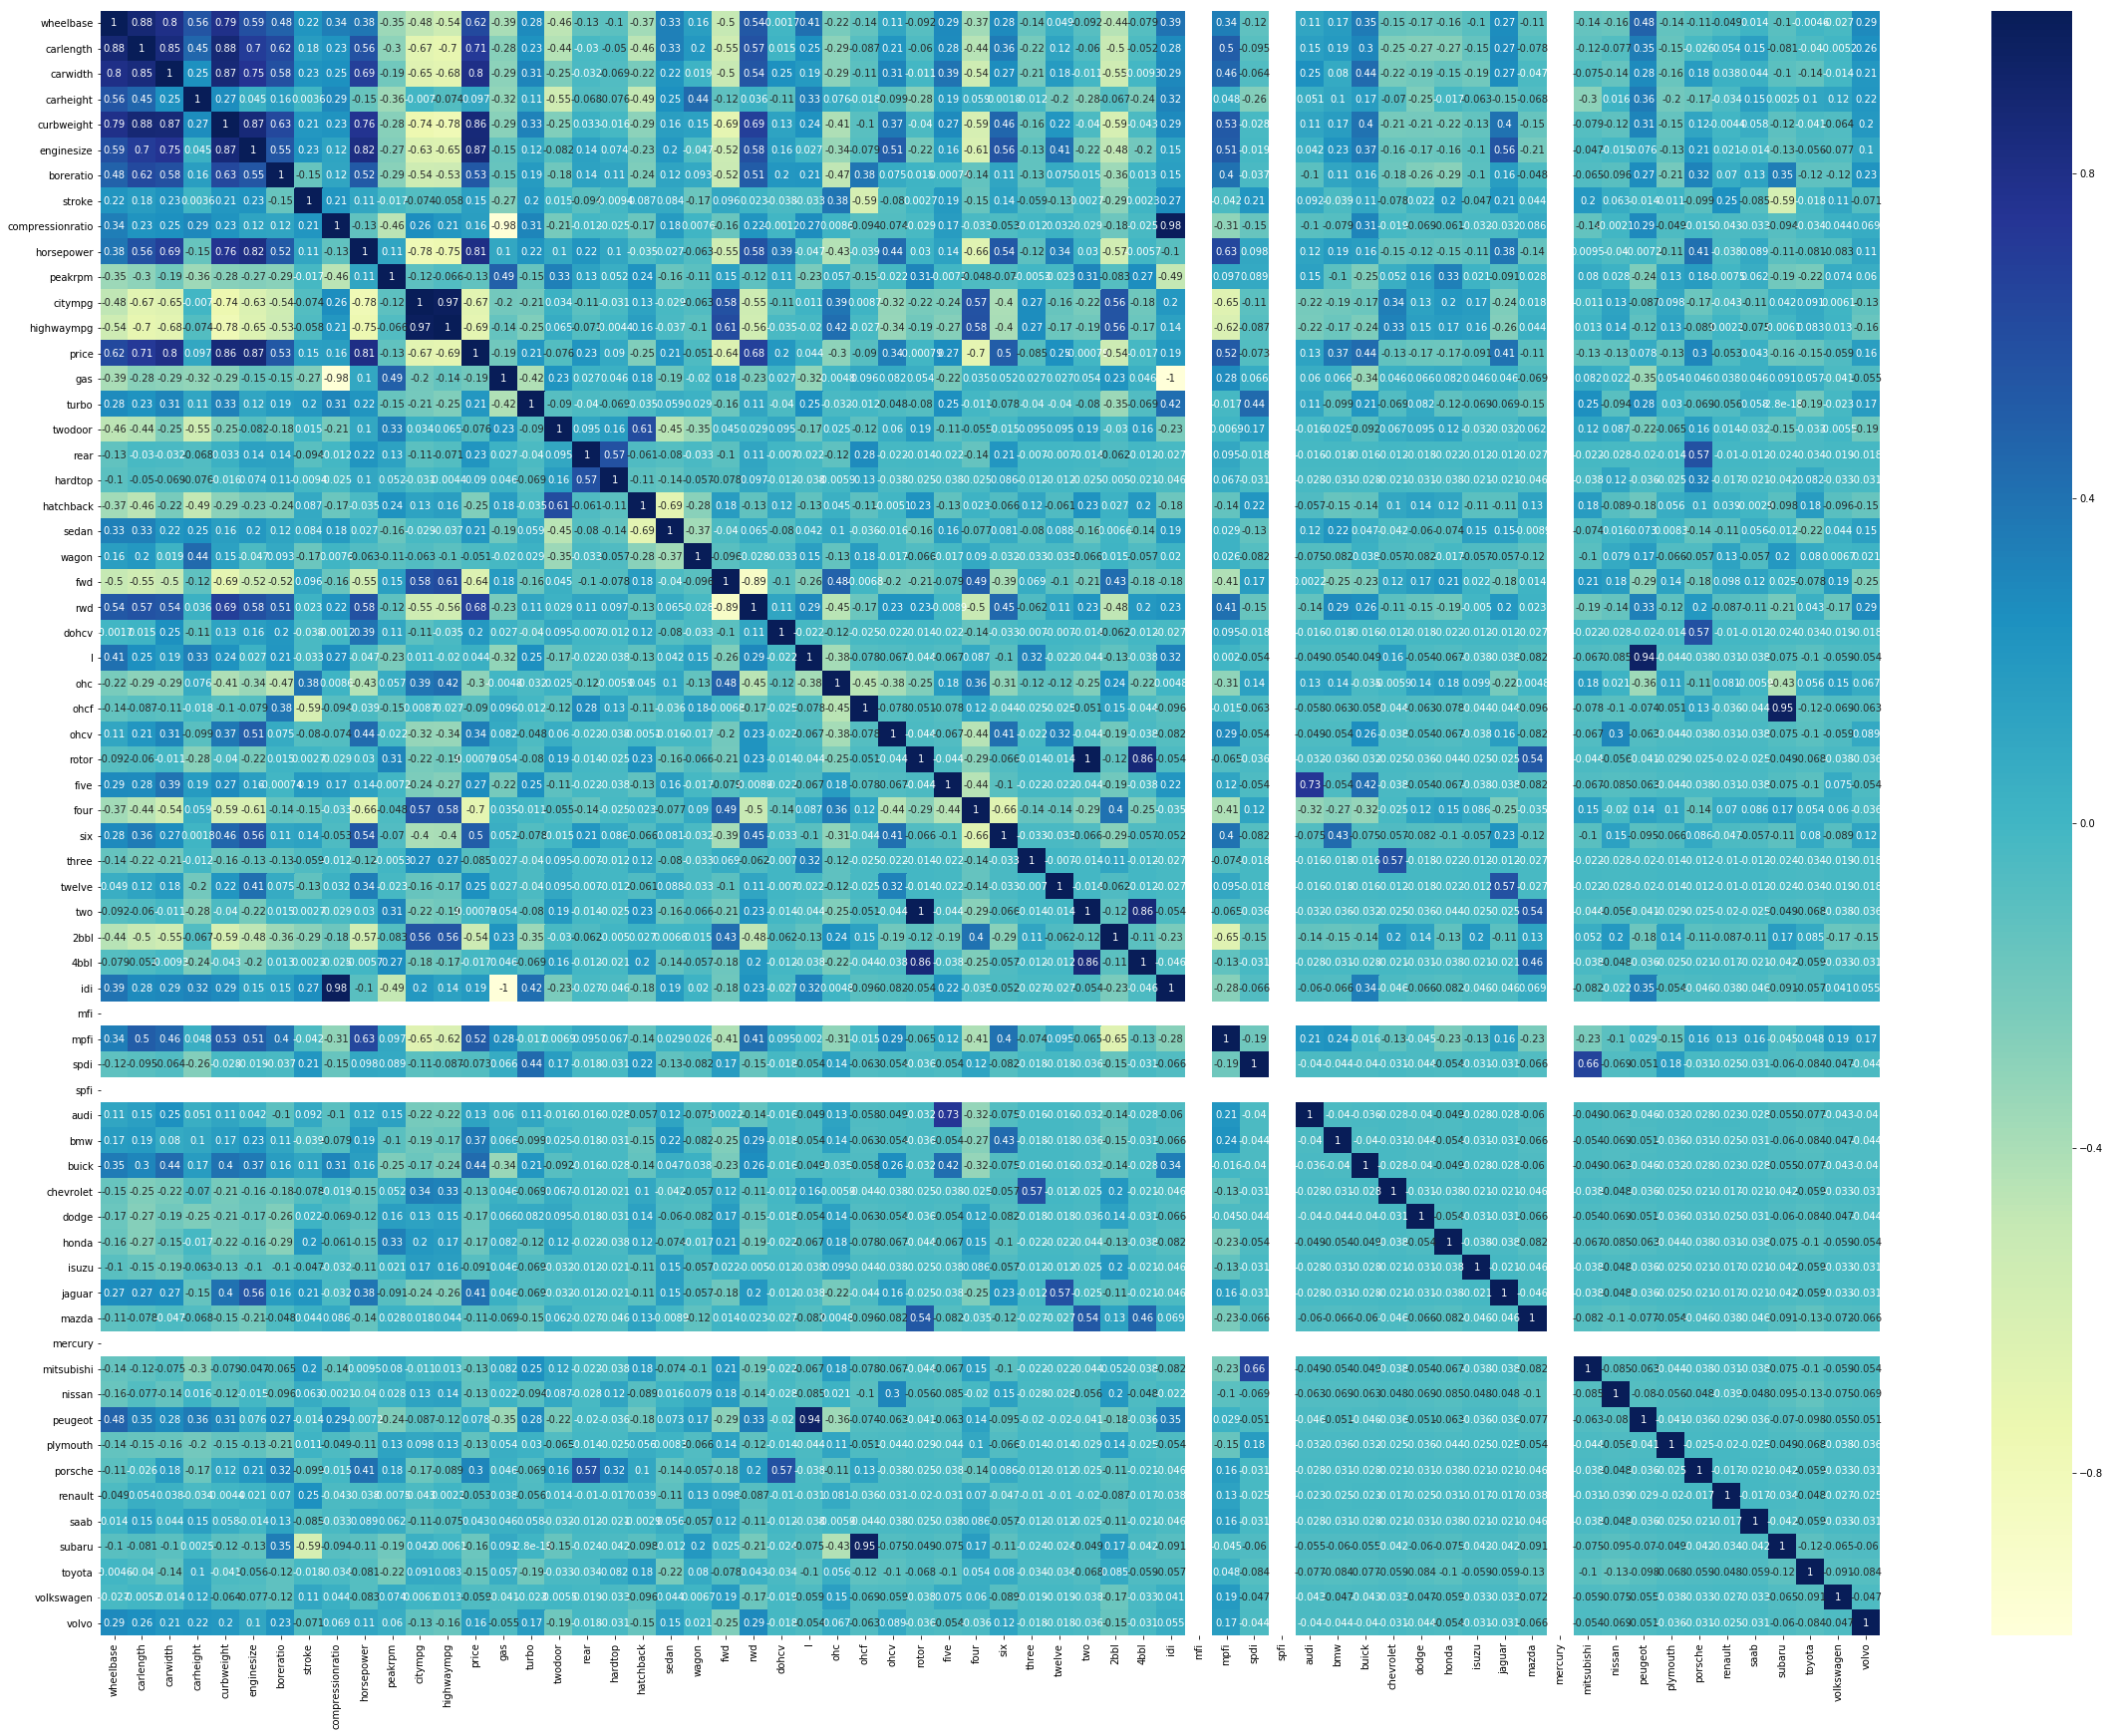

In [187]:
#Corelation using heatmap
plt.figure(figsize=(40,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [188]:
# Dividing into X & Y sets for model building
y_train = df_train.pop('price')
X_train = df_train


# Building a Linear Model
# RFE Approach

In [189]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 63 columns):
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null float64
enginesize          143 non-null float64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null float64
peakrpm             143 non-null int64
citympg             143 non-null int64
highwaympg          143 non-null int64
gas                 143 non-null uint8
turbo               143 non-null uint8
twodoor             143 non-null uint8
rear                143 non-null uint8
hardtop             143 non-null uint8
hatchback           143 non-null uint8
sedan               143 non-null uint8
wagon               143 non-null uint8
fwd                 143 non-null uint8
rwd              

In [191]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [192]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 14),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 42),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 5),
 ('compressionratio', False, 44),
 ('horsepower', False, 11),
 ('peakrpm', False, 51),
 ('citympg', False, 49),
 ('highwaympg', False, 50),
 ('gas', False, 38),
 ('turbo', False, 21),
 ('twodoor', False, 47),
 ('rear', True, 1),
 ('hardtop', False, 17),
 ('hatchback', False, 15),
 ('sedan', False, 18),
 ('wagon', False, 16),
 ('fwd', False, 48),
 ('rwd', False, 24),
 ('dohcv', False, 36),
 ('l', False, 7),
 ('ohc', False, 43),
 ('ohcf', False, 12),
 ('ohcv', False, 22),
 ('rotor', True, 1),
 ('five', False, 3),
 ('four', False, 4),
 ('six', False, 31),
 ('three', True, 1),
 ('twelve', False, 2),
 ('two', True, 1),
 ('2bbl', False, 40),
 ('4bbl', False, 26),
 ('idi', False, 39),
 ('mfi', False, 53),
 ('mpfi', False, 29),
 ('spdi', False, 30),
 ('spfi', False, 52),
 ('audi', False, 25),


In [193]:
var = X_train.columns[rfe.support_]
var

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear', 'rotor',
       'three', 'two', 'bmw', 'porsche'],
      dtype='object')

In [194]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,rear,rotor,three,two,bmw,porsche
122,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0,0,0,0,0,1
166,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0,0


# 1st Model

In [224]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.18e-65
Time:                        13:27:43   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1587      0.018     -8.591      0.0

In [225]:
#Dropping three as it is insignificant (p-value)
X_train_new = X_train_rfe.drop(["three"], axis = 1)

In [226]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.55e-65
Time:                        13:27:52   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1478      0.018     -8.035      0.0

The following variables has impact on the car prices with boreratio having a negative 
carwidth       0.3036      
curbweight     0.3210      
enginesize     0.5421      
boreratio     -0.1107      
rear           0.3233      
rotor          0.0741      
two            0.0741      
bmw            0.2480      
porsche        0.1675

price= -0.1478+0.3036*carwidth+0.3210*Curbweight+0.5421*enginesize-0.1107*boreratio+0.3233*rear+0.0741*rotor+0.0741*two+0.2480*bmw+0.1676*porsche

# Manual Approach

In [227]:
import statsmodels.api as sm
X_train_sm=X_train[['enginesize','curbweight','horsepower','carwidth','carlength','rwd','wheelbase','boreratio','mpfi']]
X_train_sm=sm.add_constant(X_train_sm)

In [228]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const        -0.122583
enginesize    0.523622
curbweight    0.158687
horsepower    0.204295
carwidth      0.310753
carlength    -0.066433
rwd           0.084145
wheelbase    -0.014756
boreratio    -0.057856
mpfi          0.002854
dtype: float64

In [229]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     80.61
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.80e-49
Time:                        13:28:07   Log-Likelihood:                 150.28
No. Observations:                 143   AIC:                            -280.6
Df Residuals:                     133   BIC:                            -250.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1226      0.025     -4.888      0.0

In [230]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,13.95
0,const,11.69
5,carlength,8.91
7,wheelbase,6.75
4,carwidth,6.03
3,horsepower,5.84
1,enginesize,5.41
6,rwd,2.17
9,mpfi,1.89
8,boreratio,1.85


MODEL2

In [232]:
# Dropping curbweight as it has high VIF 
X = X_train_sm.drop('curbweight', 1,)

In [233]:
# Build a second model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [234]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     90.17
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.81e-50
Time:                        13:28:30   Log-Likelihood:                 149.49
No. Observations:                 143   AIC:                            -281.0
Df Residuals:                     134   BIC:                            -254.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1289      0.025     -5.245      0.0

In [235]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.19
4,carlength,7.58
6,wheelbase,6.49
3,carwidth,5.82
2,horsepower,5.46
1,enginesize,4.31
5,rwd,1.96
8,mpfi,1.88
7,boreratio,1.84


MODEL3

In [236]:
# Dropping carlength as it has high VIF
X = X.drop('carlength', 1)

In [237]:
# Build a third model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [238]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.65e-51
Time:                        13:28:51   Log-Likelihood:                 149.47
No. Observations:                 143   AIC:                            -282.9
Df Residuals:                     135   BIC:                            -259.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1301      0.023     -5.559      0.0

In [239]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.21
3,carwidth,5.52
2,horsepower,5.46
1,enginesize,4.24
5,wheelbase,4.09
4,rwd,1.96
7,mpfi,1.75
6,boreratio,1.69


MODEL4

In [240]:
#dropping carwidth as it has high VIF
X = X.drop('carwidth', 1)

In [241]:
# Build a fourth model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [242]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.20e-49
Time:                        13:29:12   Log-Likelihood:                 143.19
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     136   BIC:                            -251.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1030      0.023     -4.475      0.0

In [243]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.11
2,horsepower,4.38
1,enginesize,4.21
4,wheelbase,1.96
3,rwd,1.88
6,mpfi,1.74
5,boreratio,1.64


MODEL5

In [244]:
# Dropping mpfi as it is insignificant (p-value)
X = X.drop('mpfi', 1)

In [245]:
# Build a fifth model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [246]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.06e-50
Time:                        13:29:37   Log-Likelihood:                 143.12
No. Observations:                 143   AIC:                            -274.2
Df Residuals:                     137   BIC:                            -256.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1021      0.023     -4.477      0.0

In [247]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.01
1,enginesize,4.15
2,horsepower,3.56
4,wheelbase,1.92
3,rwd,1.88
5,boreratio,1.63


MODEL6

In [248]:
#Dropping boreratio has it is insignificant (p=value)
X = X.drop('boreratio', 1)

In [249]:
# Build a sixth model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [250]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.66e-52
Time:                        13:29:55   Log-Likelihood:                 142.88
No. Observations:                 143   AIC:                            -275.8
Df Residuals:                     138   BIC:                            -260.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1109      0.019     -5.893      0.0

In [251]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.15
1,enginesize,4.13
2,horsepower,3.48
4,wheelbase,1.84
3,rwd,1.82


Analysis :Since the VIF value is below 5 and all features have significant value of P.we will not perform futher iterations.
EngineSize,HorsePower,WheelBase,rwd are the significant variables which will predict the price.
Each unit rise in engineSize will increase the average of price by 4.13 units
Each unit rise in horsepower will increase the average of price by 3.48 units
Each unit rise in wheelbase will increase the average of price by 1.84 units
Each unit rise in rwd will increase the average of price by 1.82 units


##  Residual Analysis of the train data to verify error terms are normally distributed

In [252]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

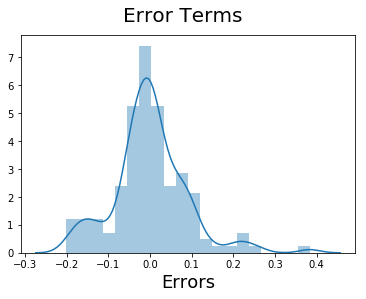

In [253]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see from the above graph the error terms are normally distributed

In [254]:
num_vars=['wheelbase', 'curbweight', 'enginesize', 'boreratio','horsepower','carlength','carwidth','price'] 
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0.313793,0.409756,0.341667,53.0,0.235066,0.139623,0.404762,3.03,9.0,0.091667,...,0,0,0,0,0,0,0,1,0,0
186,0.368966,0.497561,0.433333,55.7,0.305275,0.181132,0.404762,3.40,9.0,0.154167,...,0,0,0,0,0,0,0,0,1,0
59,0.420690,0.596748,0.516667,53.7,0.347944,0.230189,0.563492,3.39,8.6,0.150000,...,0,0,0,0,0,0,0,0,0,0
165,0.272414,0.448780,0.308333,52.6,0.301396,0.139623,0.444444,3.08,9.4,0.266667,...,0,0,0,0,0,0,0,1,0,0
140,0.231034,0.263415,0.291667,55.7,0.291699,0.177358,0.746032,2.64,8.7,0.104167,...,0,0,0,0,0,0,1,0,0,0


In [255]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,54.124194,0.428470,0.265673,0.556580,3.267742,10.350000,0.248858,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.212861,0.189947,0.165440,2.438670,0.179488,0.162820,0.228484,0.318261,4.379039,0.163376,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.056911,0.183333,49.400000,0.128394,0.067925,-0.111111,2.070000,7.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,52.150000,0.305275,0.177358,0.404762,3.150000,8.500000,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,54.450000,0.406129,0.226415,0.563492,3.350000,9.000000,0.218750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,55.700000,0.564876,0.316038,0.746032,3.460000,9.400000,0.295833,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,59.800000,0.935609,0.932075,0.888889,3.900000,23.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
df_test.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'twodoor',
       'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [257]:
y_test = df_test.pop('price')
X_test = df_test[['enginesize','horsepower','rwd','wheelbase']]


In [258]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [259]:
# Making predictions using the sixth model
y_pred_m6 = lr_6.predict(X_test_m6)
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.66e-52
Time:                        13:30:44   Log-Likelihood:                 142.88
No. Observations:                 143   AIC:                            -275.8
Df Residuals:                     138   BIC:                            -260.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1109      0.019     -5.893      0.0

Text(0, 0.5, 'y_pred')

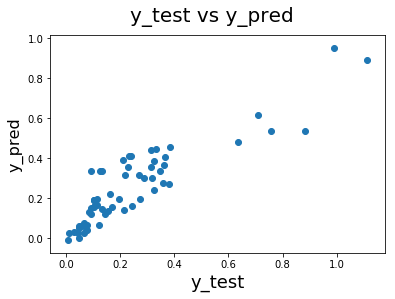

In [260]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [261]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m6)


0.8002527464233848